# Load the data

In [1]:
import numpy as np
import pandas as pd
import os
 
data = [] 
# get csv file p0-9.csv

# from folder all_digits take each csv file using pandas
for i in range(10):
    data.append(pd.read_csv(f'./all_digits/p{i}.csv', header=None))
    

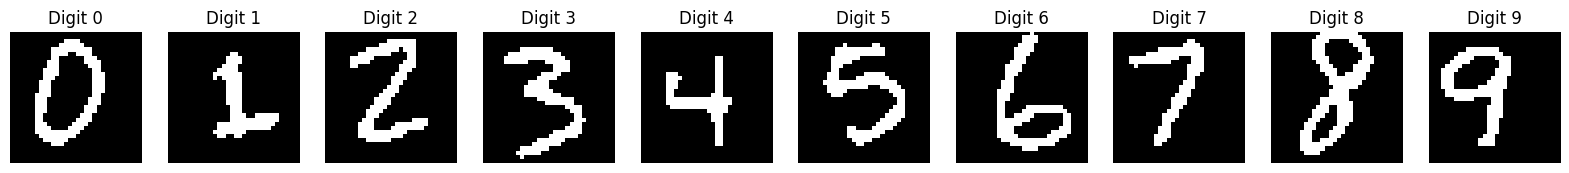

In [2]:
data_reshaped = [d.values.reshape(-1, 32, 32) for d in data]   


# Show the first image of each digit
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axs[i].imshow(data_reshaped[i][0].T, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Digit {i}')


In [3]:
len(data[0])

1024

Pattern converged after 4 steps


Text(0.5, 1.0, 'Recovered pattern')

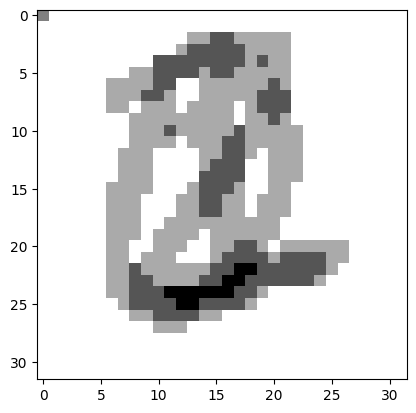

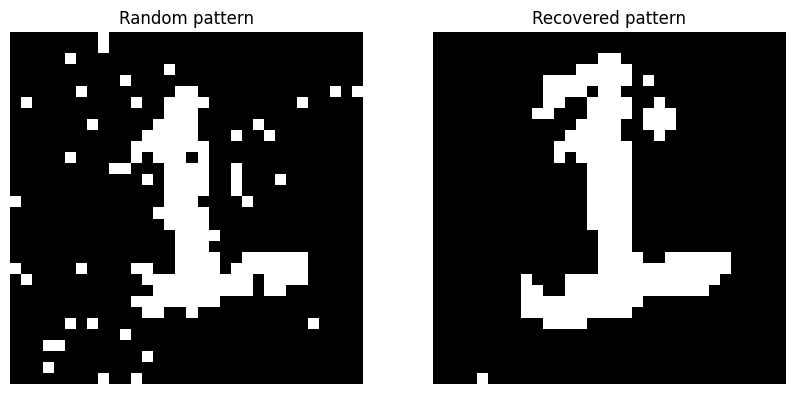

In [5]:
from HopfieldNetwork import *
from distort_image import *

# Create a Hopefield network for each digit training is embedded in init
# give to the hopefiled no reshaped data
#hopfield_networks = [HopefieldNet(d) for d in data_reshaped]

# Give to the net the first 3 digits
hopfield_network = HopfieldNet(data_reshaped[0:3], dimension=len(data[0]))

noise = 0.05
# Create a random pattern
random_pattern = distort_image(data_reshaped[1][0], noise)
random_pattern_show = distort_image(data_reshaped[1][0], noise)

# mask the image instead of noise

# recover the random pattern with the first digit
# feed the pattern only with an arrray of 1 and -1
recovered_random_pattern, energy = hopfield_network.recall(random_pattern.reshape(-1, 1), steps=100, dimension=len(data[0]), bias=0.6)

# show weights for the first digit
plt.imshow(hopfield_network.weights[0].reshape(32, 32).T, cmap='gray')

# Show the recovered pattern before and after
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(random_pattern_show.reshape(32, 32).T, cmap='gray')
axs[1].imshow(recovered_random_pattern.reshape(32, 32).T, cmap='gray')

axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('Random pattern')
axs[1].set_title('Recovered pattern')




## Plotting energy evolution in update



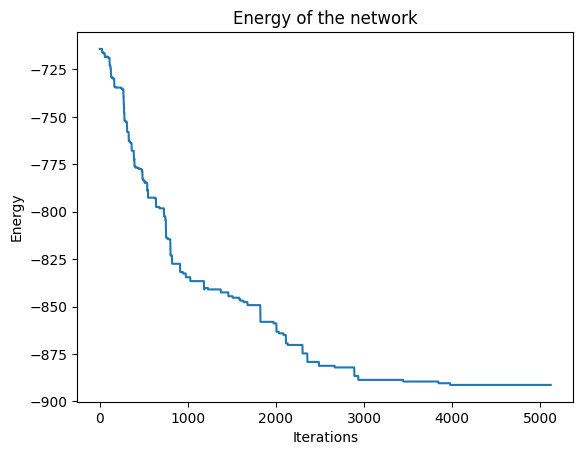

In [6]:
# change energy to be a list from np array
# plot the energy

plt.plot(np.array(energy).flatten())
plt.xlabel('Iterations')
plt.ylabel('Energy')
plt.title('Energy of the network')
plt.show()